# 1. EMNIST Dataset Exploration

* see EMNIST paper [here](https://arxiv.org/pdf/1702.05373v1.pdf)
* see EMNIST website [here](https://www.nist.gov/itl/iad/image-group/emnist-dataset)


* see my related blogpost "From Exploration to Production - combining PyTorch and TensorFlow for Deep Learning" [here]()

In [4]:
from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import loadmat

from emnist_dl2prod.utils import load_emnist, show_img

In [5]:
emnist_folder_path = "emnist_data/"

In [6]:
x_train, y_train, x_test, y_test, mapping = load_emnist(emnist_folder_path,
                                                        download=True)

[2019-05-03 11:13:59] INFO:emnist_dl2prod.utils:Loading train and test data from emnist_data/emnist-byclass.mat


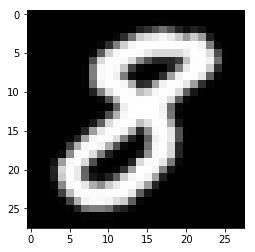

Label: [ 8 56]


In [7]:
show_img(187000, x_train, y_train, x_test, y_test, mapping, mode='train')

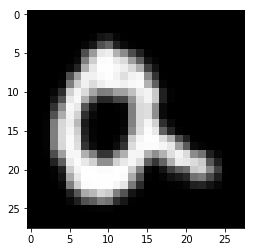

Label: [36 97]


In [8]:
show_img(305999, x_train, y_train, x_test, y_test, mapping, mode='train')

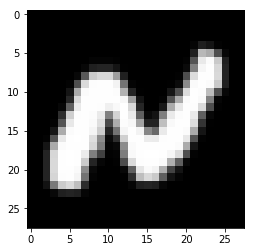

Label: [23 78]


In [9]:
show_img(492000, x_train, y_train, x_test, y_test, mapping, mode='train')

## Get some basic stats on the data

In [10]:
n_train = x_train.shape[0]
n_test = x_test.shape[0]

In [11]:
n_train

697932

In [12]:
n_test

116323

In [13]:
print("{:.1f}:1 train/test-set-split".format(n_train/n_test))

6.0:1 train/test-set-split


## Class Distribution

In [14]:
dist = pd.DataFrame.from_dict({'label': mapping[:,0], 'ascii_code': mapping[:,1]})
dist['readable_label'] = dist['ascii_code'].apply(lambda x: chr(x))
dist['train_count'] = pd.Series(y_train.flatten()).value_counts().sort_index()
dist['test_count'] = pd.Series(y_test.flatten()).value_counts().sort_index()
dist['train_share'] = dist['train_count']/n_train
dist['test_share'] = dist['test_count']/n_test
dist['letter_freq_train'] = np.nan
dist['letter_freq_test'] = np.nan

In [15]:
shares = {}
digit_idxs = [not (el.isupper()|el.islower()) for el in dist['readable_label']]
upper_idxs = [el.isupper() for el in dist['readable_label']]
lower_idxs = [el.islower() for el in dist['readable_label']]
for dataset in ['train', 'test']:
    shares[dataset] = OrderedDict()
    shares[dataset]['digits'] = dist[dataset+'_share'][digit_idxs].sum()
    shares[dataset]['uppercase'] = dist[dataset+'_share'][upper_idxs].sum()
    shares[dataset]['lowercase'] = dist[dataset+'_share'][lower_idxs].sum()

In [16]:
dist.loc[np.where(upper_idxs)[0], 'letter_freq_train'] = dist.loc[np.where(upper_idxs)[0]]['train_share']/\
                                                         dist.loc[np.where(upper_idxs)[0]]['train_share'].sum()
dist.loc[np.where(lower_idxs)[0], 'letter_freq_train'] = dist.loc[np.where(lower_idxs)[0]]['train_share']/\
                                                         dist.loc[np.where(lower_idxs)[0]]['train_share'].sum()

dist.loc[np.where(upper_idxs)[0], 'letter_freq_test'] = dist.loc[np.where(upper_idxs)[0]]['test_share']/\
                                                         dist.loc[np.where(upper_idxs)[0]]['test_share'].sum()
dist.loc[np.where(lower_idxs)[0], 'letter_freq_test'] = dist.loc[np.where(lower_idxs)[0]]['test_share']/\
                                                         dist.loc[np.where(lower_idxs)[0]]['test_share'].sum()

In [17]:
dist.head()

label  ascii_code readable_label  train_count  test_count  train_share  \
0      0          48              0        34585        5778     0.049554   
1      1          49              1        38374        6330     0.054982   
2      2          50              2        34203        5869     0.049006   
3      3          51              3        35143        5969     0.050353   
4      4          52              4        33535        5619     0.048049   

   test_share  letter_freq_train  letter_freq_test  
0    0.049672                NaN               NaN  
1    0.054417                NaN               NaN  
2    0.050454                NaN               NaN  
3    0.051314                NaN               NaN  
4    0.048305                NaN               NaN

In [18]:
labels = ['digits', 'uppercase', 'lowercase']
explode = (0.05, 0.05, 0.05)

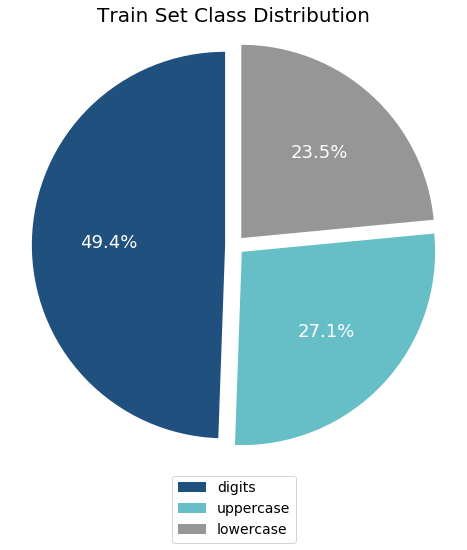

In [19]:
colors = ['#20517e','#66bec6','#969696']
plt.figure(figsize=(8,8))
plt.pie(shares['train'].values(), colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=False, startangle=90,
        textprops={'fontsize': 18, 'color':'w'})
plt.axis('equal')
plt.title('Train Set Class Distribution', fontsize=20)
plt.legend(labels, fontsize=14, loc='lower center', bbox_to_anchor=(0.5, -.2))
plt.show()

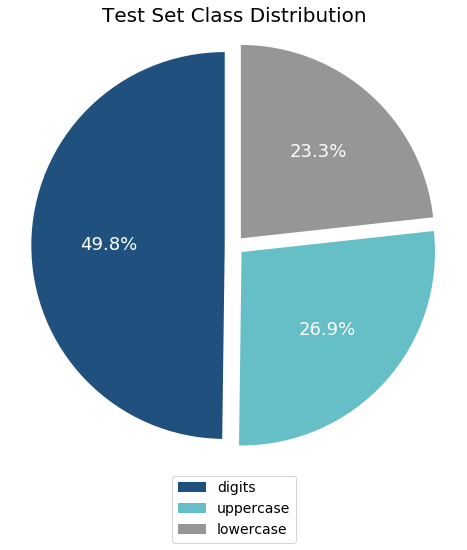

In [20]:
colors = ['#20517e','#66bec6','#969696']
plt.figure(figsize=(8,8))
plt.pie(shares['test'].values(), colors=colors, explode=explode,
        autopct='%1.1f%%', shadow=False, startangle=90,
        textprops={'fontsize': 18, 'color':'w'})
plt.axis('equal')
plt.title('Test Set Class Distribution', fontsize=20)
plt.legend(labels, fontsize=14, loc='lower center', bbox_to_anchor=(0.5, -.2))
plt.show()

In [21]:
dist.head()

label  ascii_code readable_label  train_count  test_count  train_share  \
0      0          48              0        34585        5778     0.049554   
1      1          49              1        38374        6330     0.054982   
2      2          50              2        34203        5869     0.049006   
3      3          51              3        35143        5969     0.050353   
4      4          52              4        33535        5619     0.048049   

   test_share  letter_freq_train  letter_freq_test  
0    0.049672                NaN               NaN  
1    0.054417                NaN               NaN  
2    0.050454                NaN               NaN  
3    0.051314                NaN               NaN  
4    0.048305                NaN               NaN

In [26]:
np.where(upper_idxs)[0]

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35])

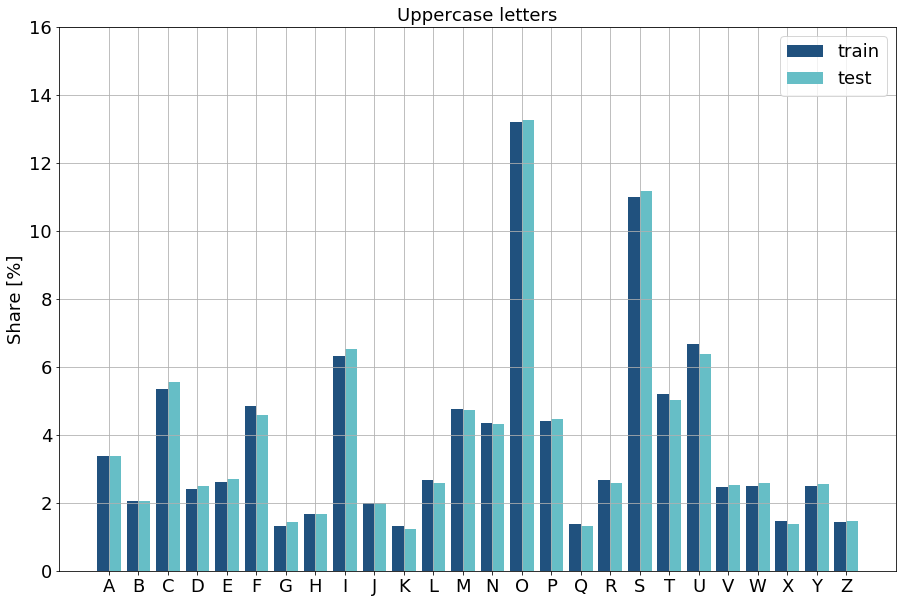

In [27]:
fs = 18
plt.figure(figsize=(15,10))
x = np.arange(26)
plt.bar(x-0.2, height=dist.loc[np.where(upper_idxs)[0]]['letter_freq_train']*100,
        width=0.4, color='#20517e', align='center')
plt.bar(x+0.2, height=dist.loc[np.where(upper_idxs)[0]]['letter_freq_test']*100,
        width=0.4, color='#66bec6', align='center')
plt.grid(True)
plt.title("Uppercase letters", fontsize=fs)
plt.ylabel("Share [%]", fontsize=fs)
plt.legend(['train', 'test'], fontsize=fs)
plt.xticks(x, list(dist.loc[np.where(upper_idxs)[0]]['readable_label']), fontsize=fs)
plt.yticks(range(0,18,2), fontsize=fs)
plt.show()

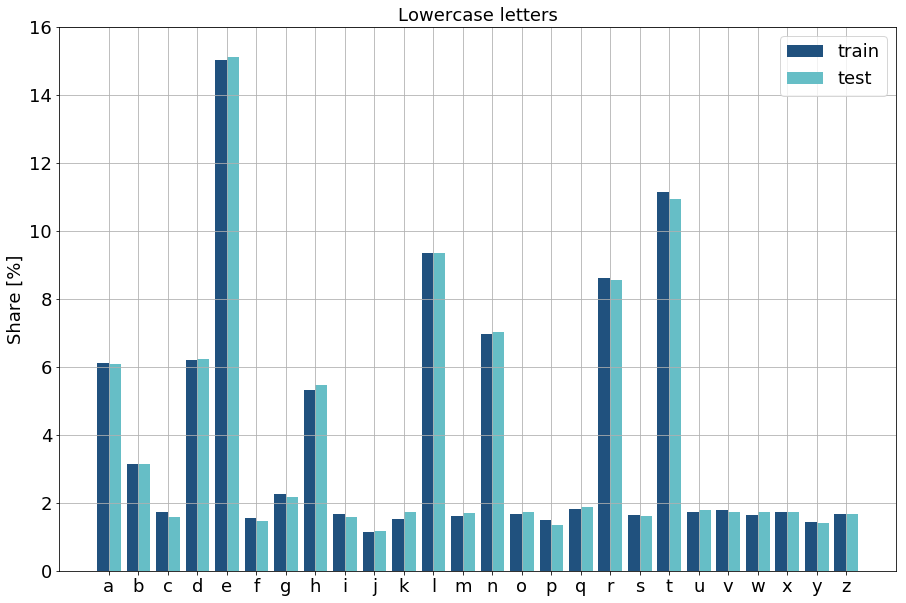

In [28]:
fs = 18
plt.figure(figsize=(15,10))
x = np.arange(26)
plt.bar(x-0.2, height=dist.loc[np.where(lower_idxs)[0]]['letter_freq_train']*100,
        width=0.4, color='#20517e', align='center')
plt.bar(x+0.2, height=dist.loc[np.where(lower_idxs)[0]]['letter_freq_test']*100,
        width=0.4, color='#66bec6', align='center')
plt.grid(True)
plt.title("Lowercase letters", fontsize=fs)
plt.ylabel("Share [%]", fontsize=fs)
plt.legend(['train', 'test'], fontsize=fs)
plt.xticks(x, list(dist.loc[np.where(lower_idxs)[0]]['readable_label']), fontsize=fs)
plt.yticks(range(0,18,2), fontsize=fs)
plt.show()